# Family Tree Demonstrations

** This notebook intended for advanced users who want to engineer custom transformation sets.

The library of transformations include some cases where a root category applied to a feature set includes more than one transformation category, as may include generations and branches of derviations. The implementation of these transformation sets is supported by transformation category entries to a set of "family tree" primitives associated with each root category, which logistics will be the focus of this notebook. Please note that the use of these primitives is primarily intended for advanced users who want to engineer custom transformation sets, otherwise pre-defined transformation sets may be assigned by their root category in assigncat 
just like any other transformation.

As an example, for the or19 root category transformation set we'll go through in detail further below, the full transformation set defined internal to the library can be assigned to a feature column in assigncat just like any other root category.
```
assigncat = {'or19' : ['featurecolumn']}
```

The following demonstrations are built on top of and extend the discussions from the essay [Specification of Derivations with Automunge](https://medium.com/automunge/specification-of-derivations-with-automunge-6174ca227184), which was intended as an introduction to the Automunge family tree primitives and their use in context of specifying custom transformation sets.

Here’s an example of three simple sets of transformations which are intended for application to numerical source columns. Each transformation has a “root category” designator which is how the sets are assigned to distinct columns in the “assigncat” dictionary passed to automunge(.), as shown here the root categories are ‘nmbr’, ‘bxcx’, and ‘log1’. Also demonstrated here are the order of application for transformations and the resulting returned columns for these root categories. Note that the transformations applied in derivation of a returned column are helpfully logged by the inclusion of suffix appenders affixed to the original column header, such as for example ‘column_nmbr’ represents the source column ‘column’ with a ‘nmbr’ transformation applied. Or ‘column_nmbr_bint’ represents the source column ‘column’ with a ‘nmbr’ transform applied followed by the assembly of a ‘bint’ set of bins identifying the number of standard deviations from the mean for each entry.

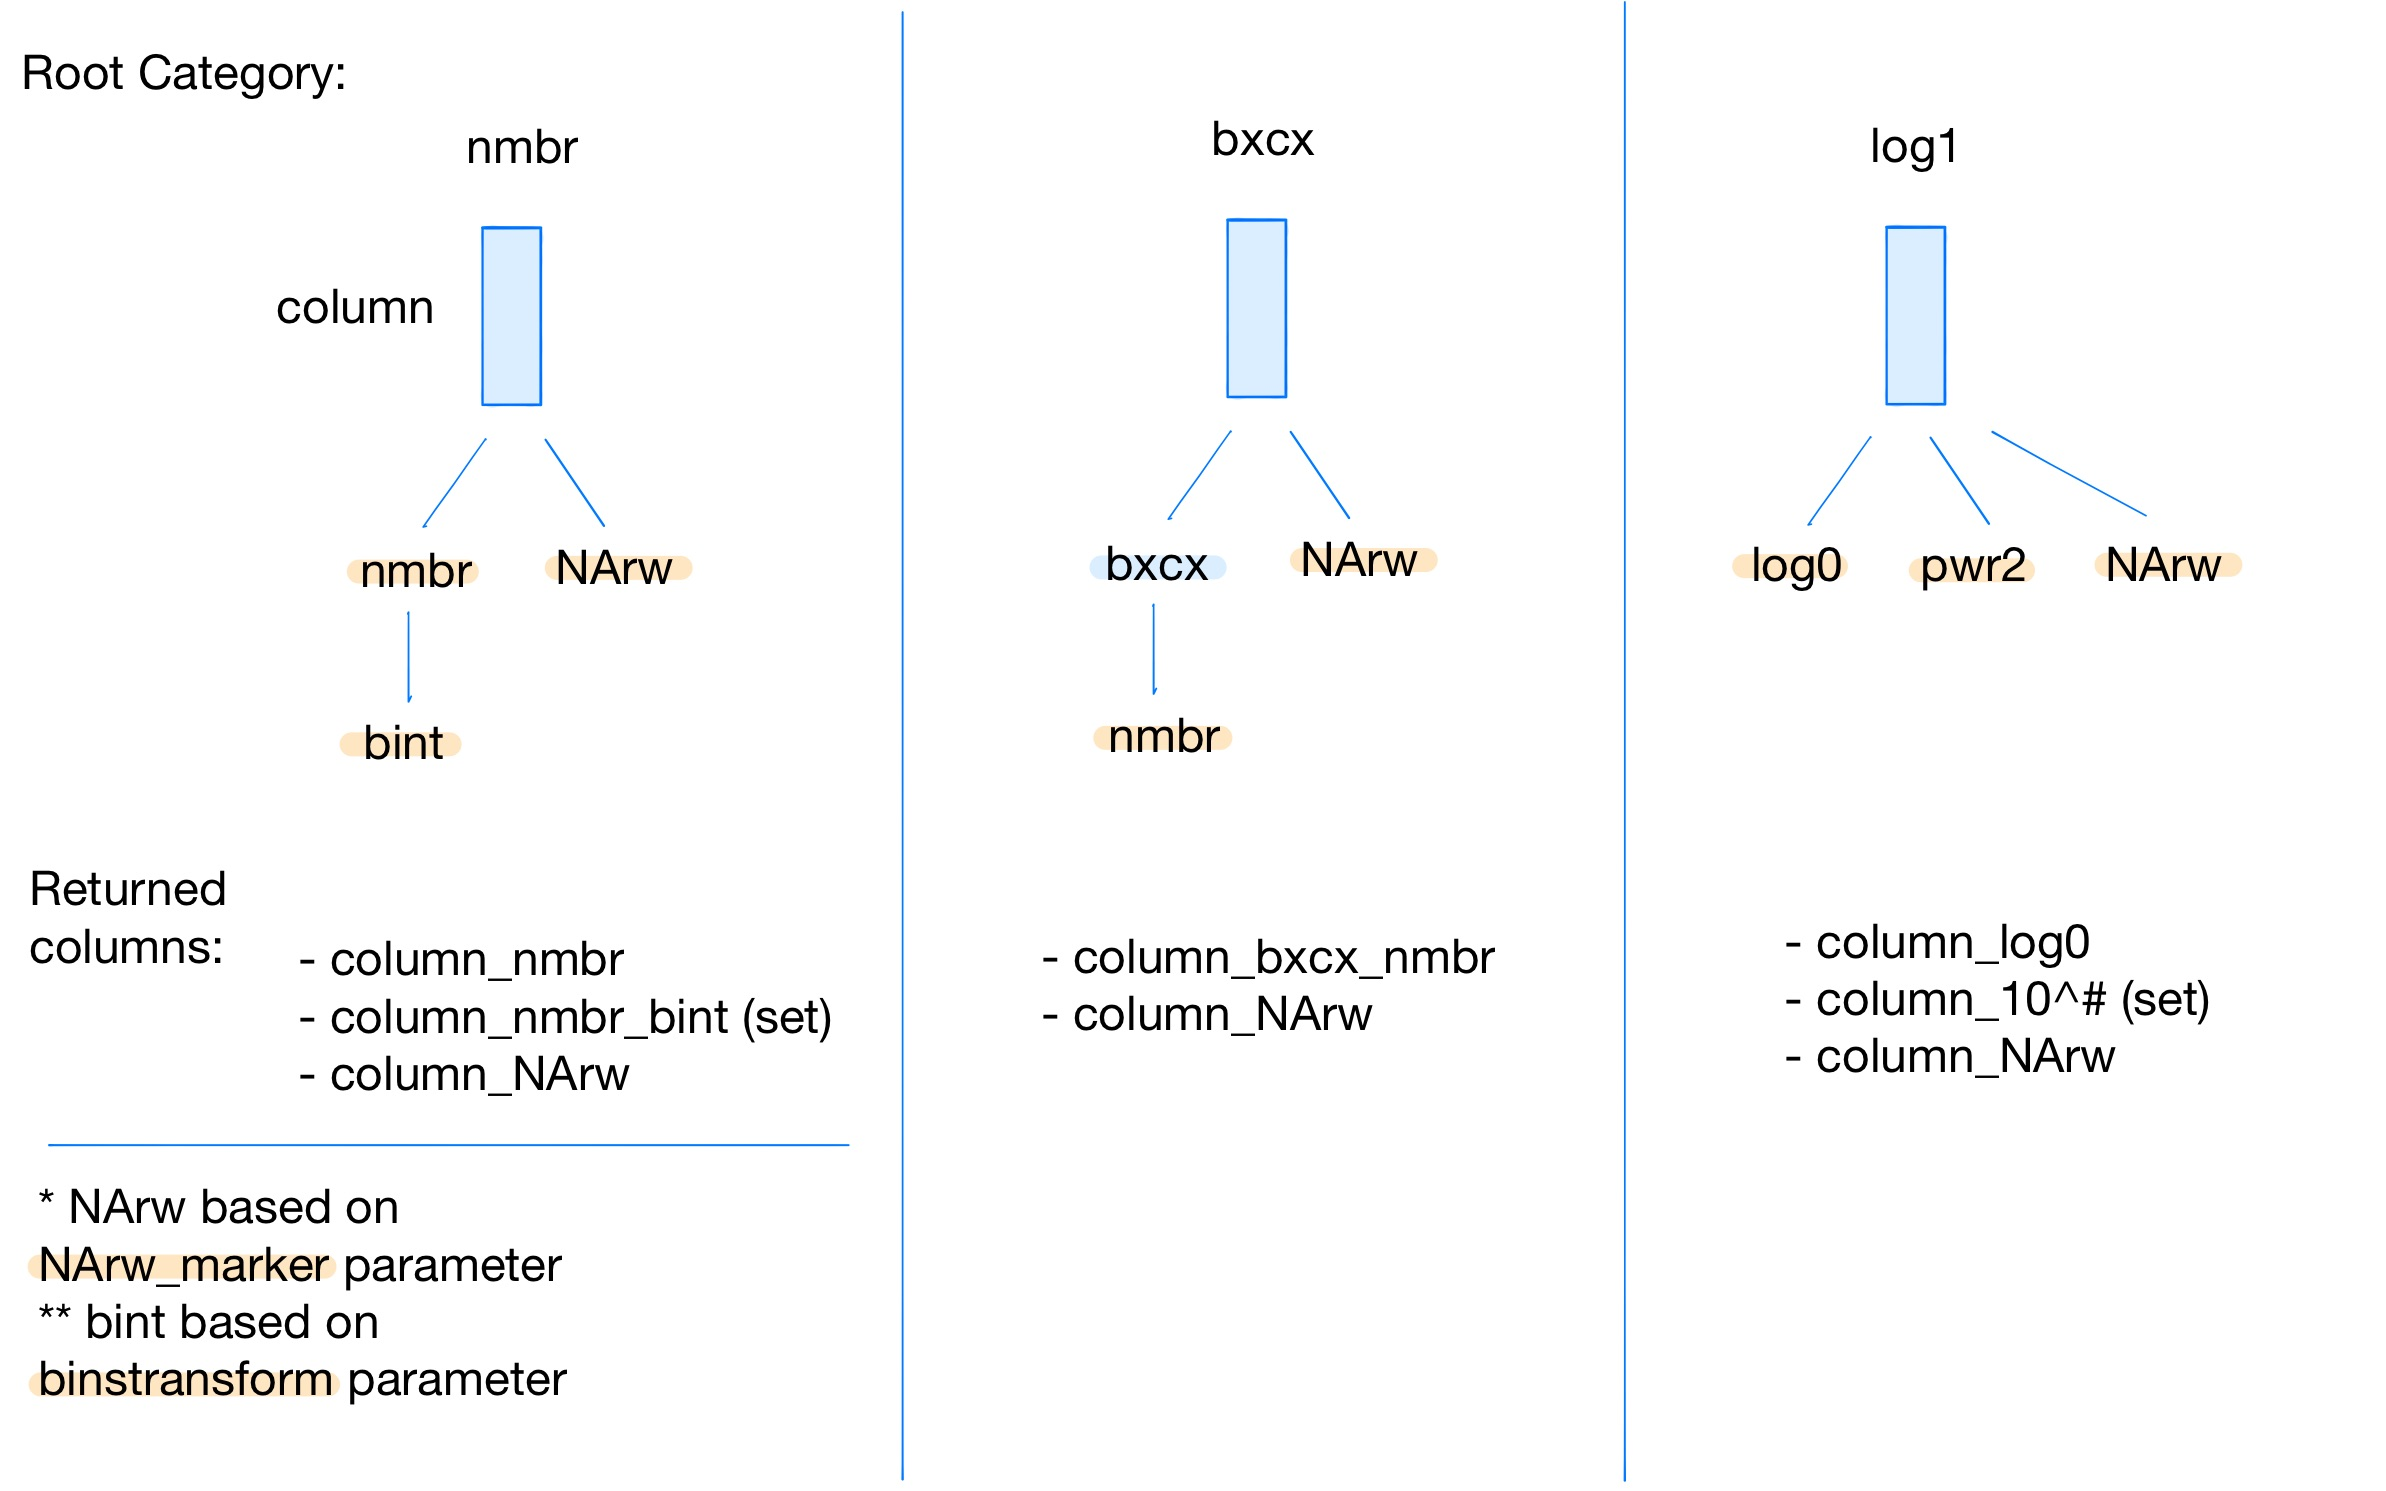

The first of these sets, the ‘nmbr’ root category, is our default transform for numerical data under automation, and so gets a little special treatment by way of the binstransform parameter which allows a user to turn on or off the inclusion of a set of bins identifying numerical entries by the number of standard deviations from the mean of the set, which to be honest is sort of a relic from very early implementations and don’t intend to offer this kind of option elsewhere going forward — the goal after all is universality and as they say in The Zen of Python “There should be one — and preferably only one — obvious way to do it.” The preferred way to specify custom transformations is by passing a transformdict to automunge(.) more on that to follow. The only other use in the library of a parameter to shape family trees is the ‘NArw_marker’ parameter which turns on/off the inclusion of a NArw set on each internally defined root category, which identifies by boolean activations presence of entries which were subject to infill.

As a few more examples of root category returned sets, the ‘bxcx’ root category is intended for numerical sets in which a distribution may have fat-tailed characteristics, thus a Box-Cox power law transformation is applied to the data prior to the application of a z-score normalization (please consider this intended for advanced users). Note again that the transformation is performed on a basis of distribution properties found in the training data passed to automunge(.), and then consistently applied to additional data, which we call such additional sets “test data”. Note also here that there is only one column returned in the ‘bxcx’ / ‘nmbr’ application (as ‘column_bxcx_nmbr’), in the next slide we’ll show how to specify. The ‘log1’ root category is another simple demonstration which receives a numerical set, and returns a column with a log transform applied, as well as a set of binned columns with activations identifying an entry’s power of ten (e.g. distinct column activations for source column values found in range 0.1–0.9, 1–9, 10–99, etc) by way of the ‘pwr2’ transform.

The specification of the family tree associated with a root category is performed in a data structure that we refer to as the “transformdict”. The transformdict has entries for each root category associated with family tree primitives of parents / siblings / auntsuncles / cousins // children / niecesnephews / coworkers / friends. The first four of these are “upstream” primitives which means they are only applied in a root category’s first generation of transformations. The second four are “downstream” primitives, and they are only inspected when the root category is found as an entry in a primitive with offspring.

(A slight bit of minutia, for advanced users: internally to codebase there is a distinction between “transformdict” without underscore and “transform_dict” with underscore, which is simply that transformdict (without underscore) is the object passed to an automunge(.) call with user defined entries, and transform_dict (with underscore) is the resulting internal consolidated version including both user passed entries and internal library entries, sorry for the tangent (Medium needs to add support for footnotes). We use this kind of underscore distinction naming convention in a few places in codebase.)

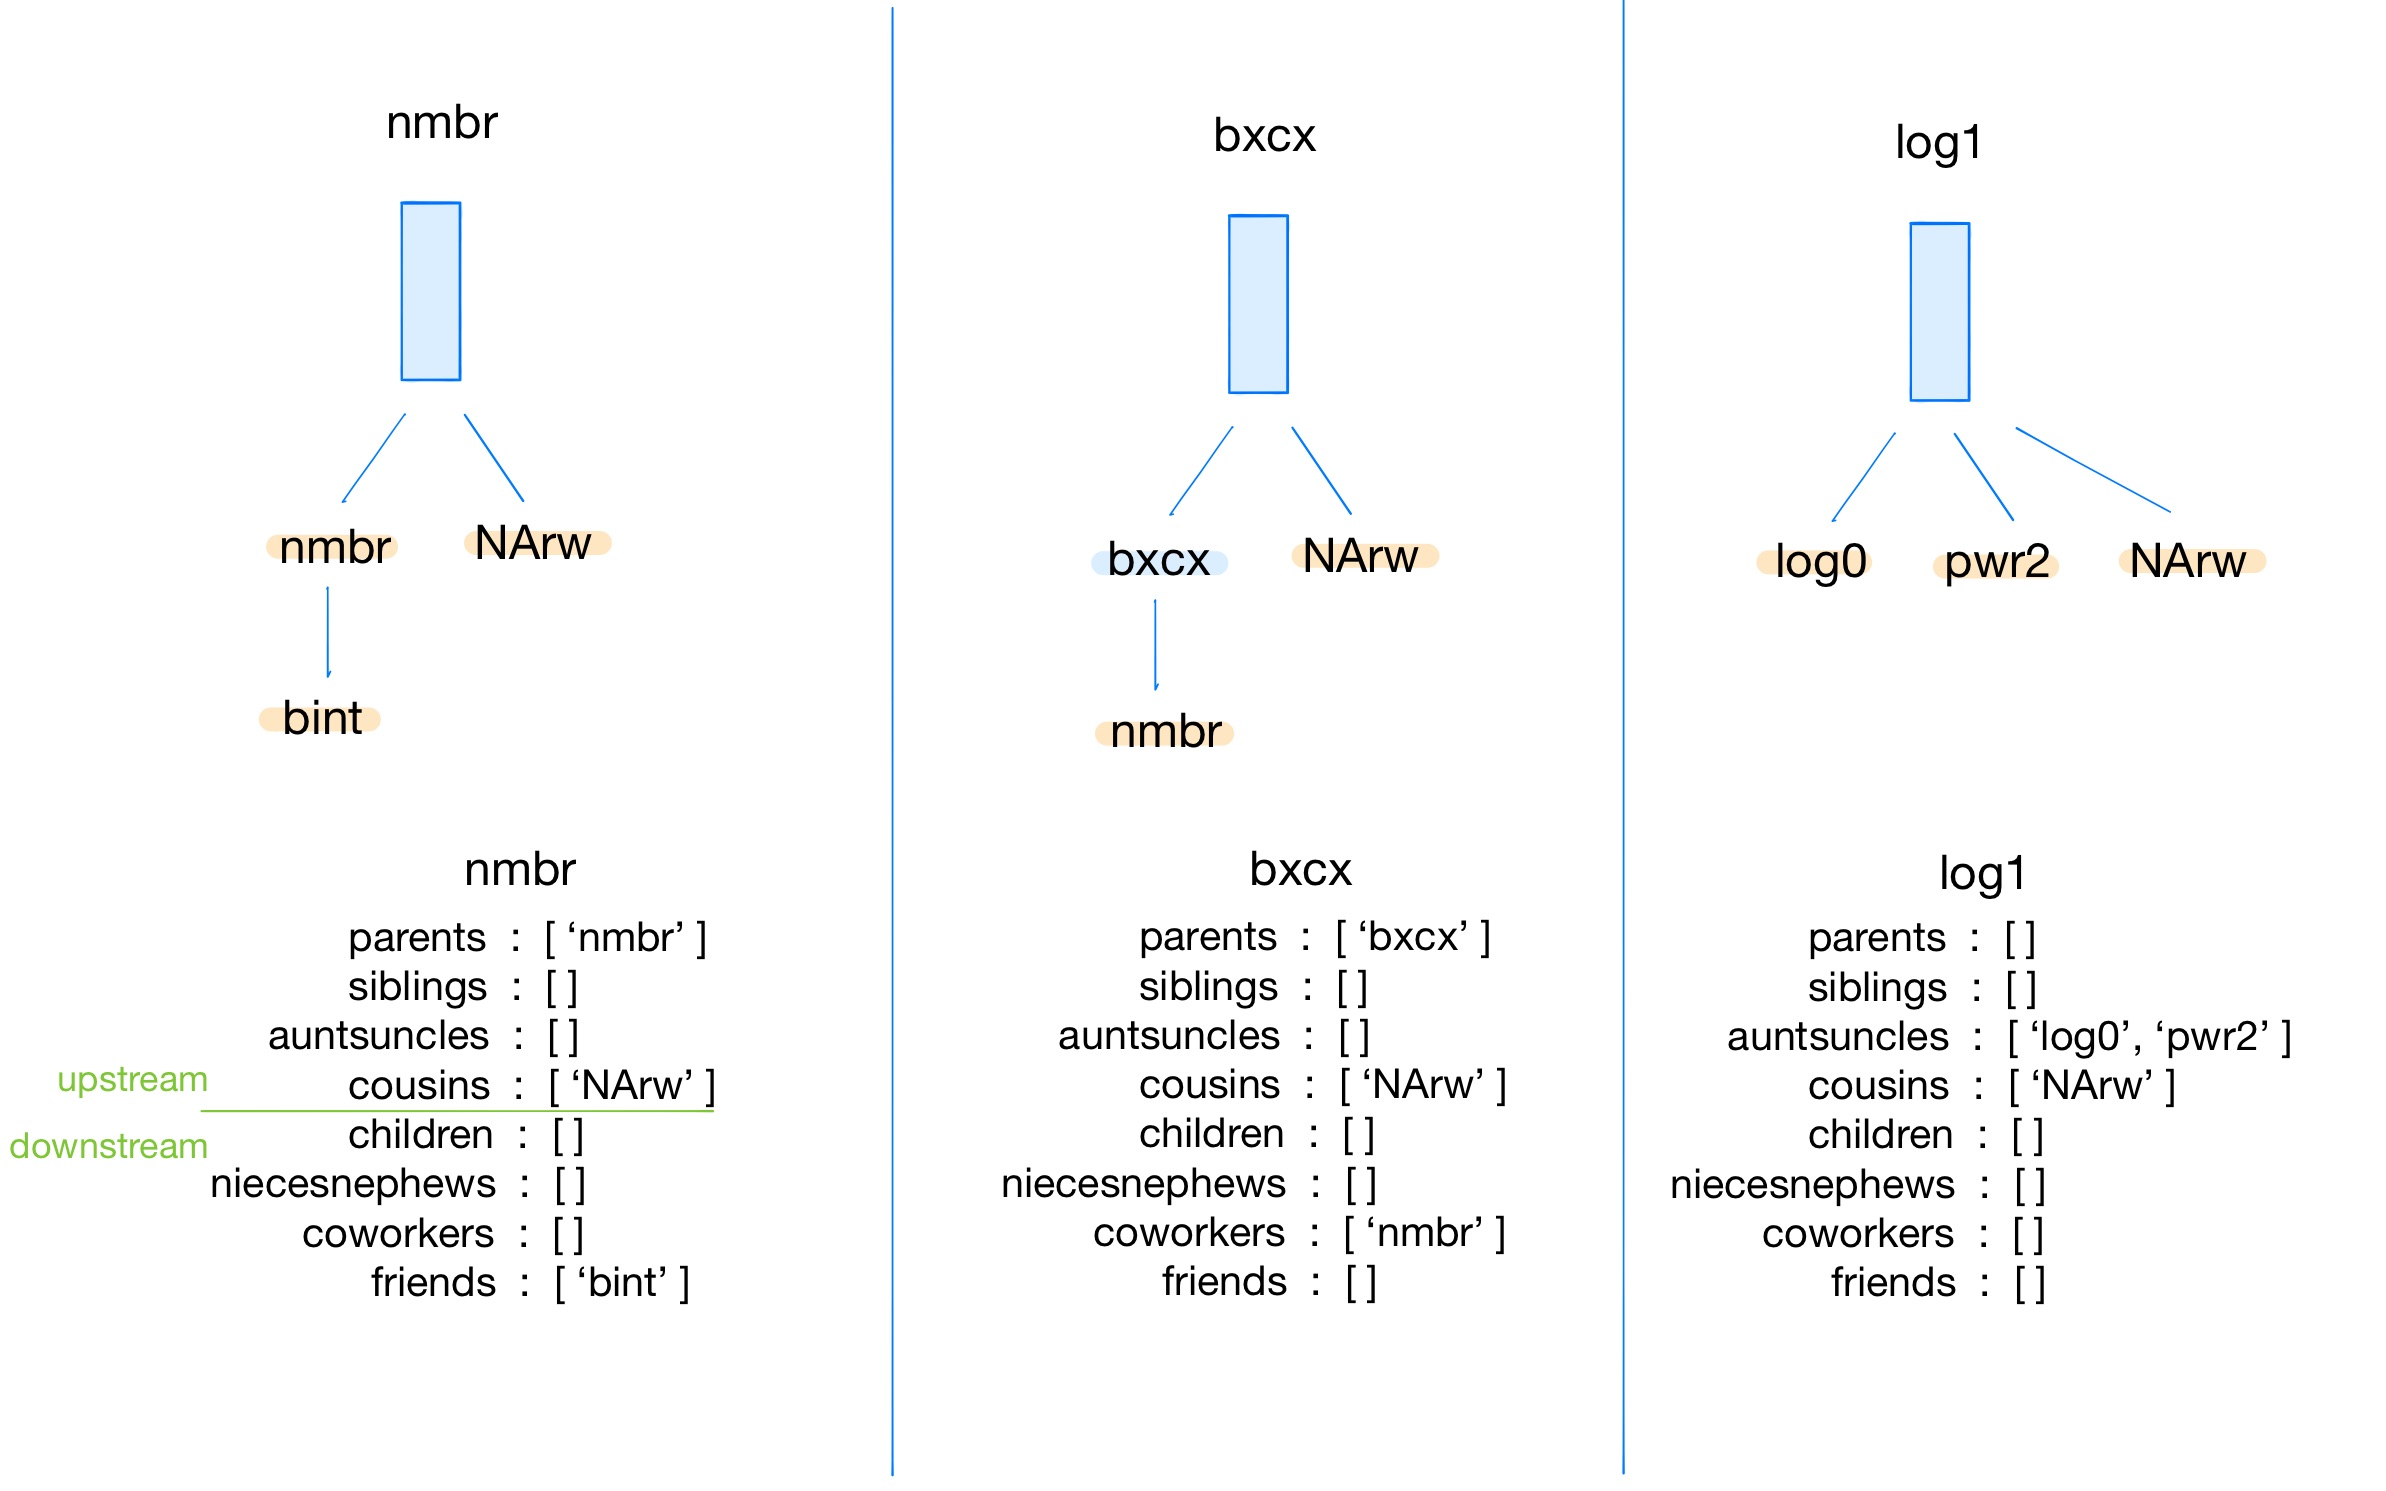

To demonstrate for these simple examples, in the root category ‘nmbr’, the family tree has entries for upstream primitives of parents and cousins. For the parents primitive entries, family trees will be inspected to identify if there are any downstream primitive entries, such as for this case ‘bint’ is found as a downstream primitive entry for root category ‘nmbr’. A root category, such as ‘nmbr’, can also be an entry to a primitive in its own family tree although that is not required. In the case of the ‘bxcx’ transform, the downstream primitive is a coworkers entry instead of friends, which differs in that it is a “replacement” primitive instead of a “supplement” primitive, which is why there is no ‘column_bxcx’ column returned, just ‘column_bxcx_nmbr’. For the ‘log1’ root category, we are only applying one generation of derivations so only upstream primitives are entered. Note that a user could still set downstream primitive entries here, but they would only be inspected and applied if ‘log1’ was found as an upstream primitive with offspring entry in some other root category’s family tree.

In [1]:
#if we wanted to define these three root categories from scratch, we could assemble a transformdict as follows:

transformdict = {}

transformdict.update({'nmbr' : {'parents'       : ['nmbr'], \
                                'siblings'      : [], \
                                'auntsuncles'   : [], \
                                'cousins'       : ['NArw'], \
                                'children'      : [], \
                                'niecesnephews' : [], \
                                'coworkers'     : [], \
                                'friends'       : ['bint']}})

transformdict.update({'bxcx' : {'parents'       : ['bxcx'], \
                                'siblings'      : [], \
                                'auntsuncles'   : [], \
                                'cousins'       : ['NArw'], \
                                'children'      : ['nmbr'], \
                                'niecesnephews' : [], \
                                'coworkers'     : [], \
                                'friends'       : []}})

transformdict.update({'log1' : {'parents'       : [], \
                                'siblings'      : [], \
                                'auntsuncles'   : ['log0', 'pwr2'], \
                                'cousins'       : ['NArw'], \
                                'children'      : [], \
                                'niecesnephews' : [], \
                                'coworkers'     : [], \
                                'friends'       : []}})


#As noted above, for root categories defined internal to library,
#the bint and NArw entries are activated by parameter (binstransform and NArw_marker)
#But for these examples of externally defined sets we've included their entries as strings
#for demonstration purposes.

#Note that here we are also assuming that the transformation category entries to the family tree
#primitives are already defined internal to the library.
#If we wanted to define new transformation categories the process is similar.

In [2]:
#We could then assign these root categories to any desired target feature sets by assigncat. 
#(list brackets are optional for single column assignments)

assigncat = {'nmbr' : ['column1', 'column2'],
             'bxcx' : 'column3',
             'log1' : 'column4',
            }

In [3]:
#Note that the transformdict is complemented by a corresponding data structure called the processdict.
#When passing a custom transformdict to an automunge(.) call, 
#a corresponding processdict is required for all defined root categories,
#with the exception of cases where you are overwriting a family tree
#already defined internal to the built in library.

#We'll discuss the processdict entries further below.

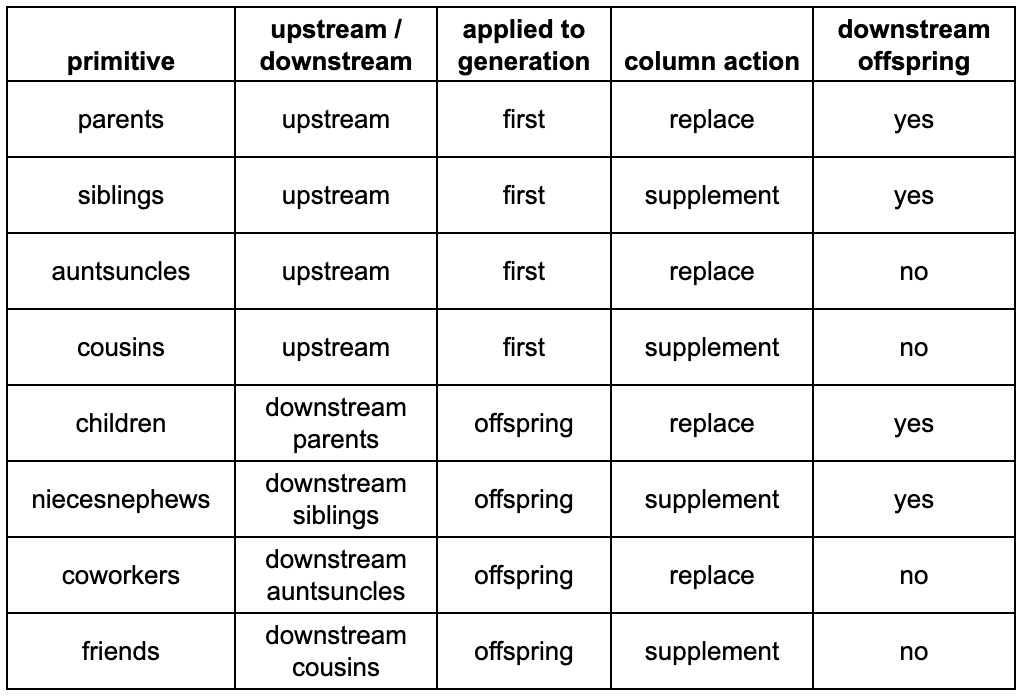

Let’s take a closer look at the family tree primitives. The primitives can be distinguished by three properties:

1) Generation: upstream primitives are inspected and applied to the first generation associated with a root category, downstream primitives are only accessed if the root category was found as an entry in a primitive with offspring (whether in its own family tree or some other family tree), and thus may even potentially be applied for multiple generations after the first.

2) Action: there is a distinction between replacement and supplement. Replacement simply means that at completion of a generation, if a replacement primitive was found, the source column will be removed (which source column may be the returned column from a prior generation or for the first tier of transforms the original column of the passed data). Note that the presence of a replacement primitive in a generation overrides any supplement primitives, so even if a single replacement primitive is found along with supplement primitives the source column will still be removed.

3) Offspring: the downstream offspring refers to the distinction of whether an additional generation will be performed after completion of a primitive entry’s transformation. Category entries to a primitive with offspring have their own family trees inspected for presence of downstream primitive entries.

Let’s take a closer look at a few more advanced derivations to demonstrate.

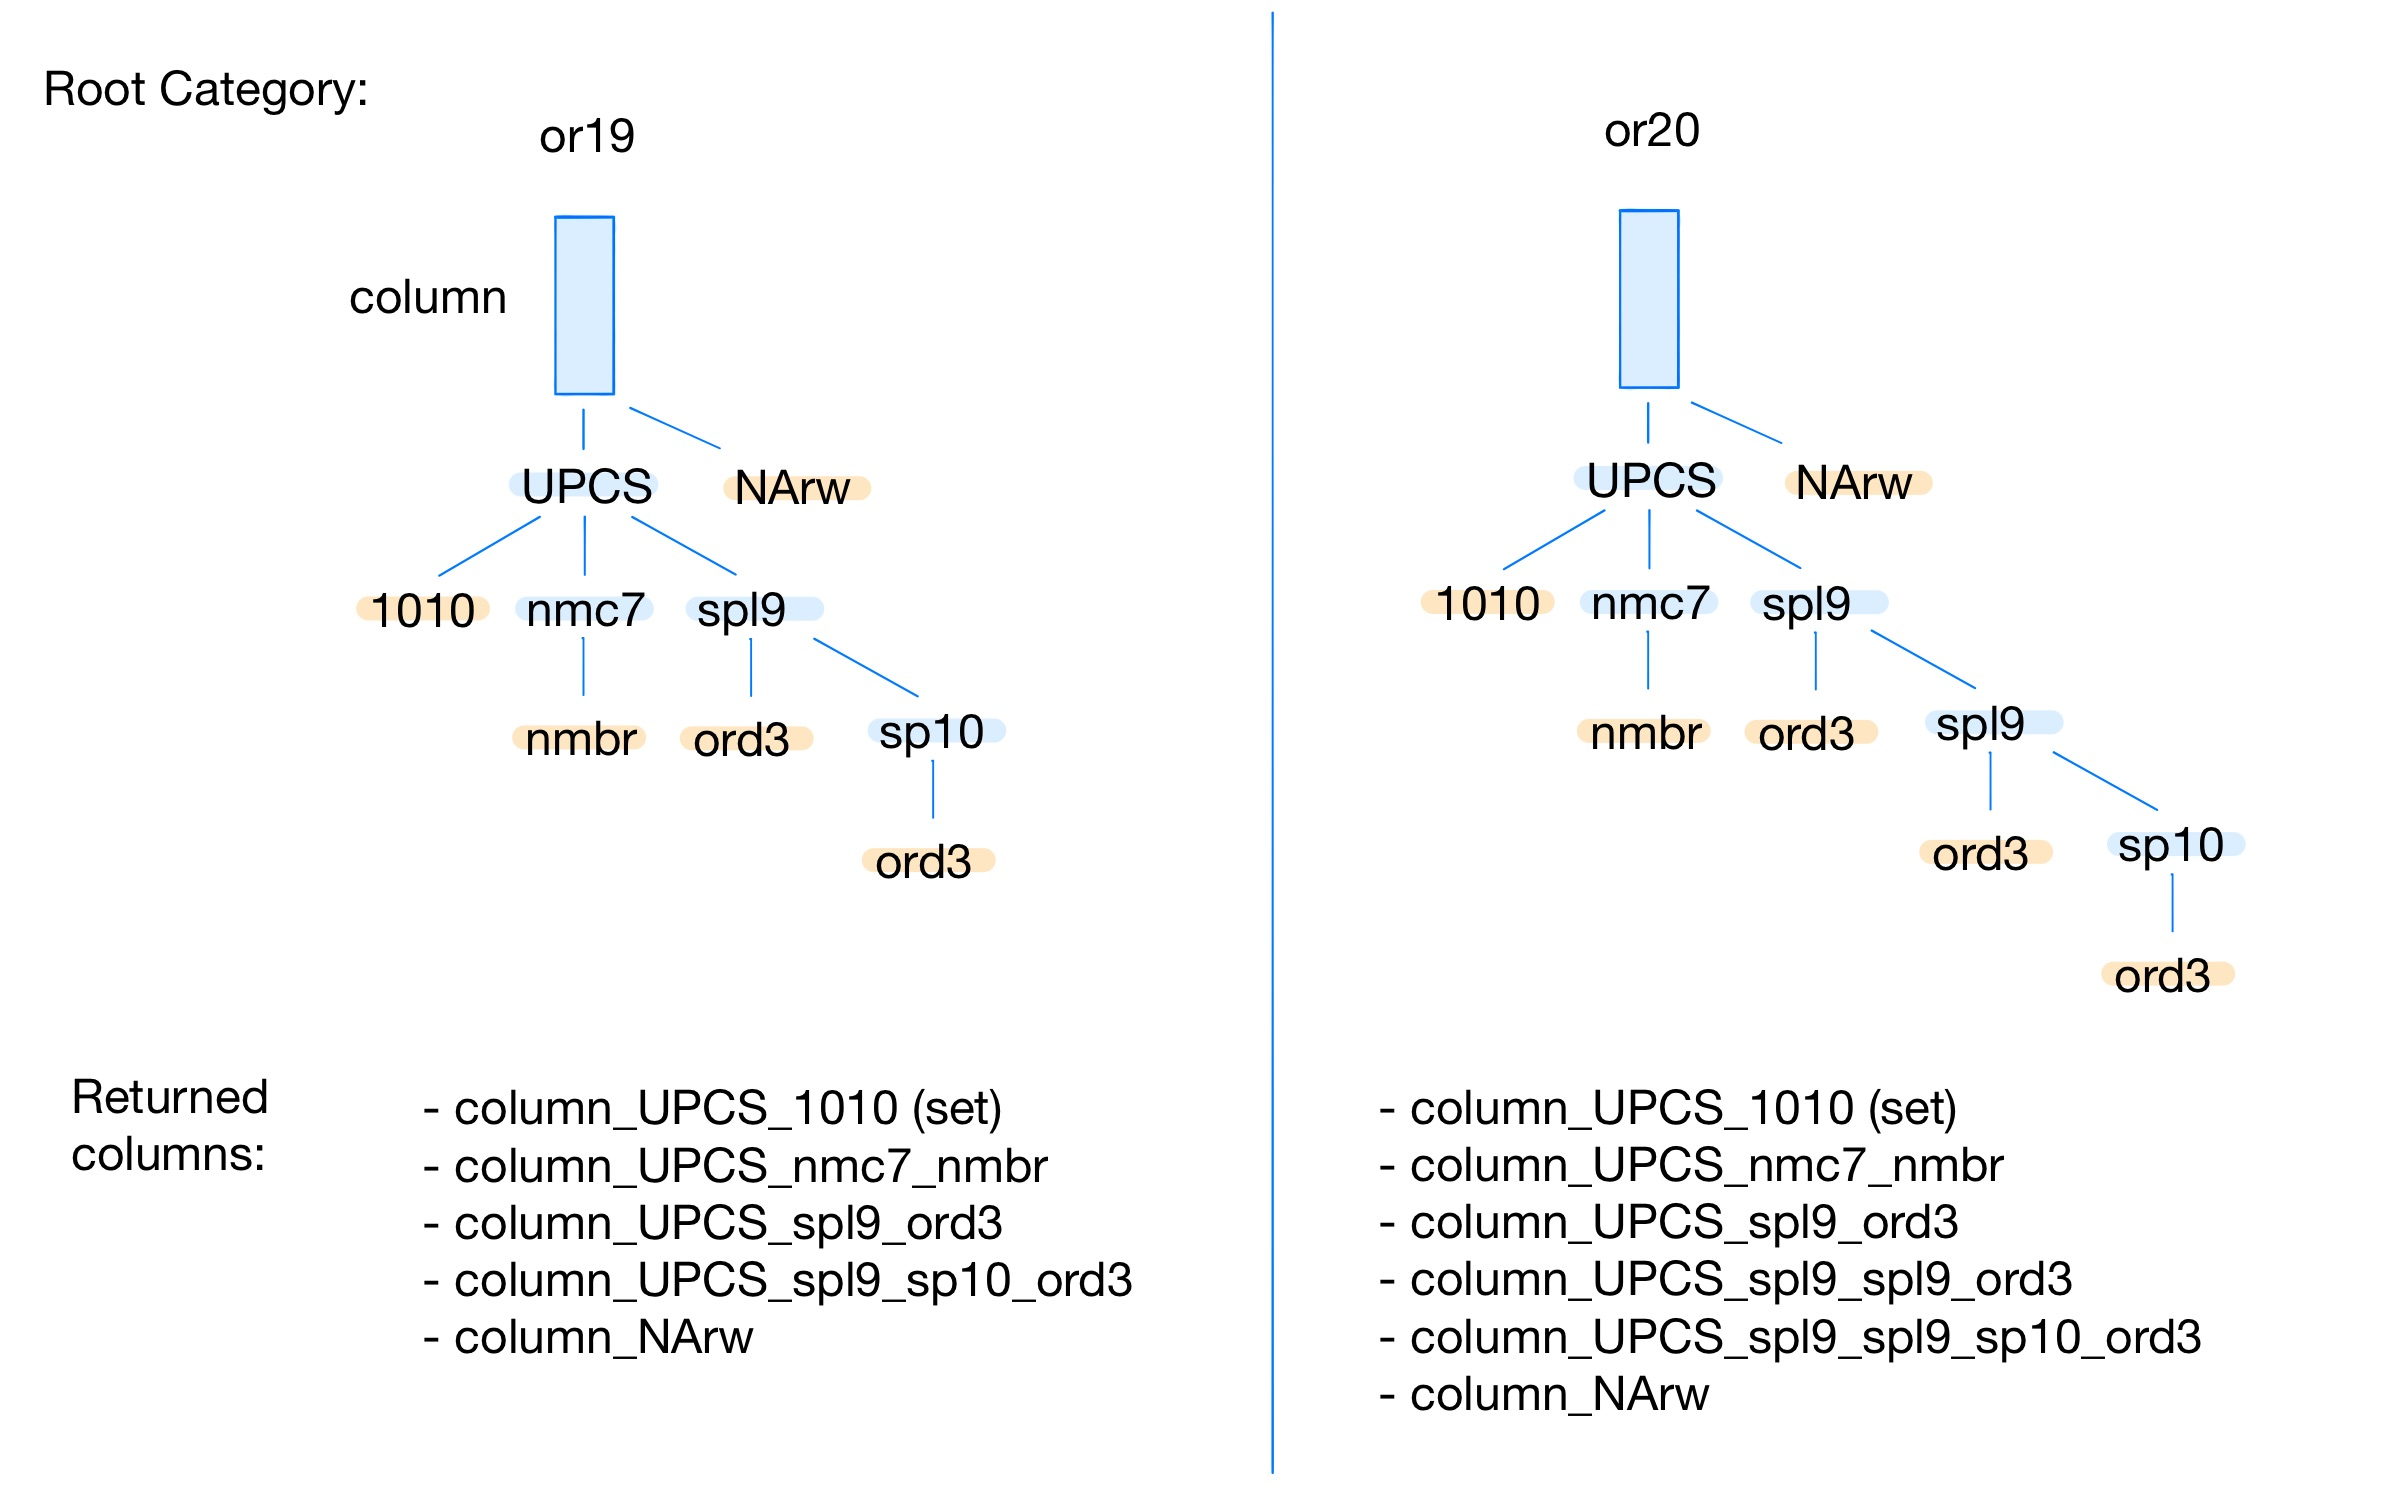

The root categories ‘or19’ and ‘or20’ are intended to encode bounded categorical string sets of unknown composition (by bounded meaning with expectation of fixed range of potential values between train and test sets — there are variants in the library for other scenarios). These root categories are very illustrative of means for specifying multi-generation sets. Included in these derivations are the ‘NArw’ derivations discussed earlier identifying entries corresponding to infill based on missing or improperly formatted data in the source column. Upstream of all of the other transforms an ‘UPCS’ transform is applied which converts all categorical string entries to uppercase, based on the assumption that entries are intended as consistent between uppercase and lowercase (for example resulting in consistent interpretation for string entries of usa, Usa, and USA). The ‘1010’ transform is a binary categorical encoding, kind of related to one-hot encoding but in which multiple columns may have simultaneous activations, thus allowing a more efficient memory bandwidth for encoding categorical sets with large range of values (sort of a compromise between one-hot encoding and ordinal encoding). The ‘nmc7’, ‘spl9’, and ‘sp10’ categories are part of our “string parsing” family of transformations which evaluate sets of string compositions to identify things like presence of numbers embedded in string entries or character overlaps between entries.

Going into more detail, the ‘nmc7’ transform parses the categorical string entries in the training set to identify any numerical string inclusions, and returns those numbers as a dedicated column of floats. Note that the ‘nmc7’ transform differs from ‘nmr7’ for instance in that the inclusion of comma characters are allowed in the numerical portion of the strings. Note that if multiple numerical entries are present in the string the longest grouping will be returned. As demonstrated here, the extraction of numerical entries can then be normalized with a z-score normalization via the ‘nmbr’ transform. The ‘spl9’ transform is really neat and I’m proud of how it turned out. It’s a means to parse training set categorical string entries to identify cases where the string compositions may have character overlaps, and if found the longer versions with identified overlaps are replaced with the shorter overlap. For example, a set with entries of [‘North Florida’, ‘Central Florida’, ‘South Florida’, ‘The Keys’] would be consolidated to and returned as [‘th Florida’, ‘Central Florida’, ‘th Florida’, ‘The Keys’], and then with a second application would be further consolidated and returned as [‘ Florida’, ‘ Florida’, ‘ Florida’, ‘The Keys’]. As demonstrated here, the application of ‘spl9’ can thus be run in multiple iterations to progressively identify shorter length character overlaps, each of which returned sets may then be further encoded with ‘ord3’ which is an ordinal encoding sorted by frequency, such as for our example would return [0, 0 , 0, 1] which is then directly digestible by machine learning algorithms. There is a small distinction between ‘spl9’ and ‘sp10’ in which entries that are not consolidated are replaced with a 0 to avoid unnecessary redundancy between earlier returned ‘spl9’ outputs and ‘sp10’ outputs, thus ‘sp10’ should only be applied to the final tier of string parsing applications.

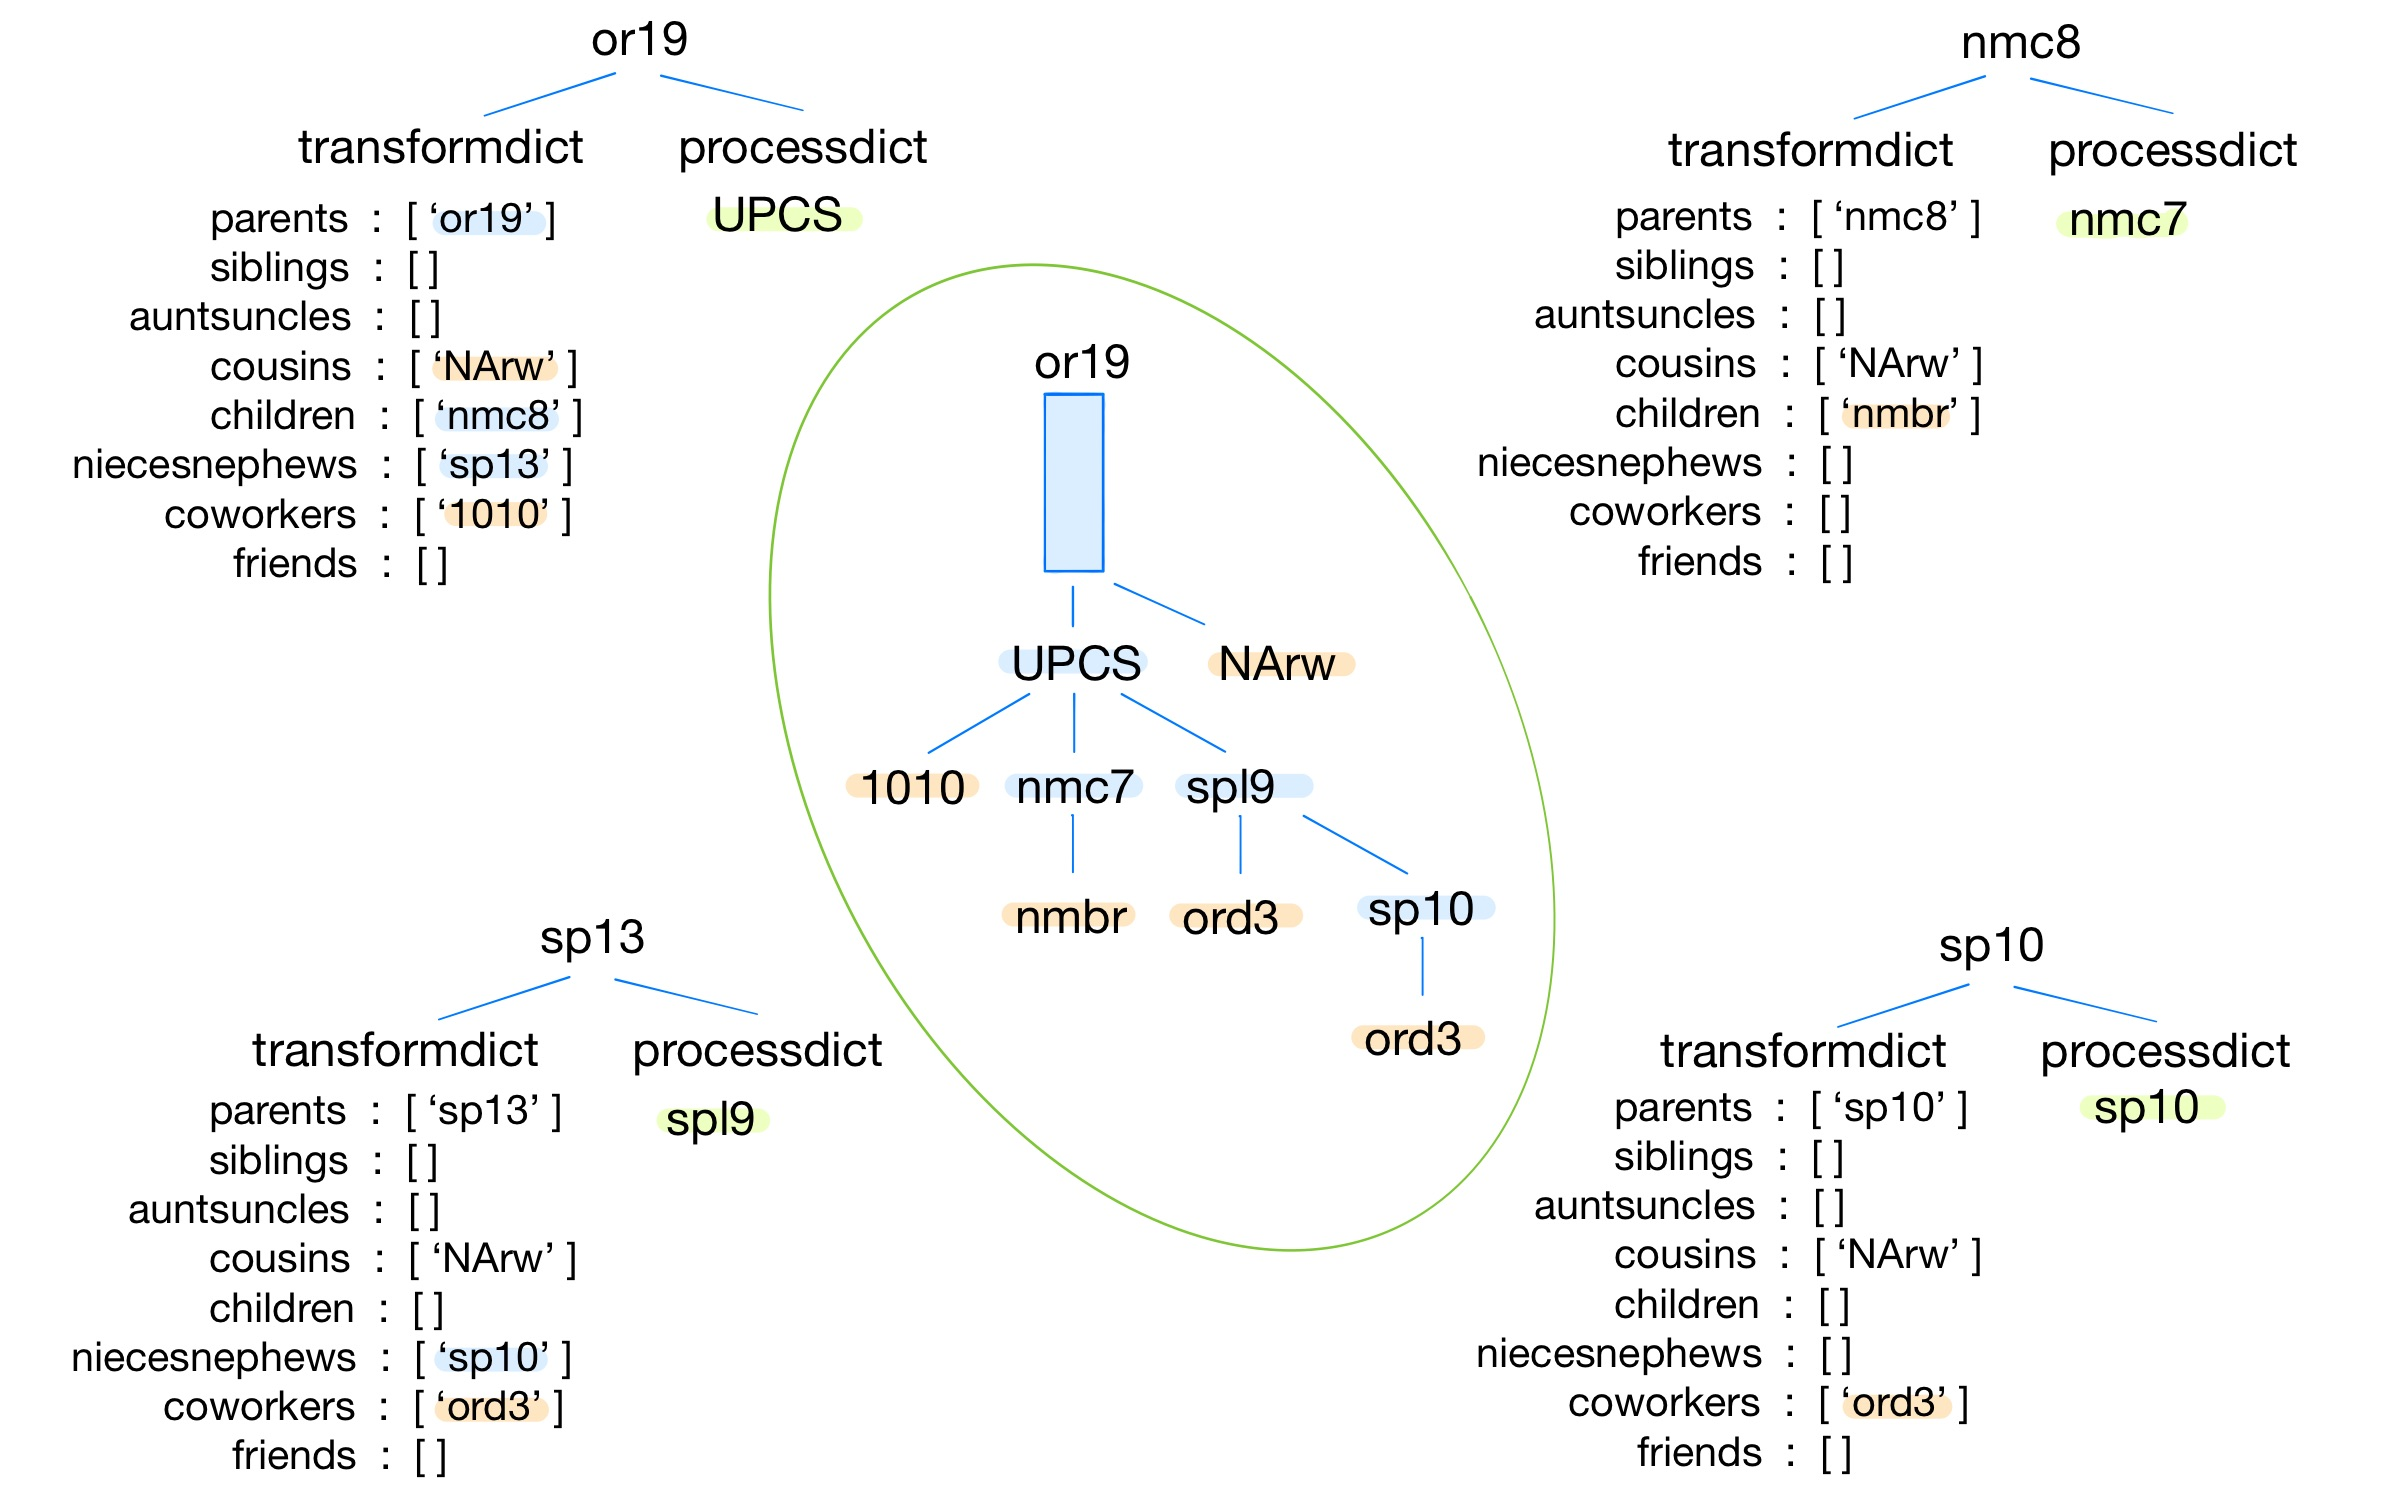

The specification of the ‘or19’ transformdict entries are now demonstrated, and we’ll see a little more complexity than our last demonstration, partly as we are showing additional detail of how a transform category is matched to a transformation function by the corresponding function entries in the “processdict”. A processdict contains a few entries associated with each category such as to distinguish expected data properties for purposes of deriving NArw entries and ML infill application (not shown), here we’re just focusing on the specification of a processdict transformation function. A transformation function may be associated with multiple transformation categories used as entries to family tree primitives, while each transformation category may only be associated with a single transformation function. Thus we’re able to specify multiple configurations of unique branches downstream of a common transformation function in different family trees. For the example of branches used to derive the specific returned column ‘column_UPCS_spl9_sp10_ord3’, a source column is assigned to the root category ‘or19’, and so upstream primitive entries are applied for ‘or19’ and ‘NArw’, here we’ll just focus on one specific path for demonstration, the entry to the parent primitive is ‘or19’, so the transformation function found in the ‘or19’ processdict entry is applied, which is ‘UPCS’. Because parents is a replacement primitive, the source column is not returned. And since parents is a primitive with offspring, the ‘or19’ transformdict is inspected for downstream primitive entries, here the one we’re interested in is the niecesnephews entry of ‘sp13’, which applies a ‘spl9’ transformation function based on the ‘sp13’ processdict entry. Since niecesnephews has downstream offspring, the ‘sp13’ family tree is inspected for downstream primitive entries, here we’re interested in ‘sp10’, which applies a ‘sp10’ transform based on the ‘sp10’ processdict. Since ‘sp10’ was accessed as a niecesnephews entry in the ‘sp13’ transformdict, we’ll look again for offspring, now looking at the downstream primitives in the ‘sp10’ transformdict, where we’ll find a coworkers primitive entry of ‘ord3’, which replaces the source column and returns an ‘ord3’ transformation based on the (not shown) ‘ord3’ processdict entry.

Here's a more thorough version of the preceding diagram. The highlighted cells in the figure indicate transformation categories that are inspected and applied. Here orange is for derivations that are retained in the returned set and blue are for derviations that are not retained based on the presence of downstream replacement primitive entries. Green shading is for those transformation functions that are inspected and applied based on processdict entries (here the single processdict entry is an abstraction for the set of corresponding transformation functions associated with a transformation category).

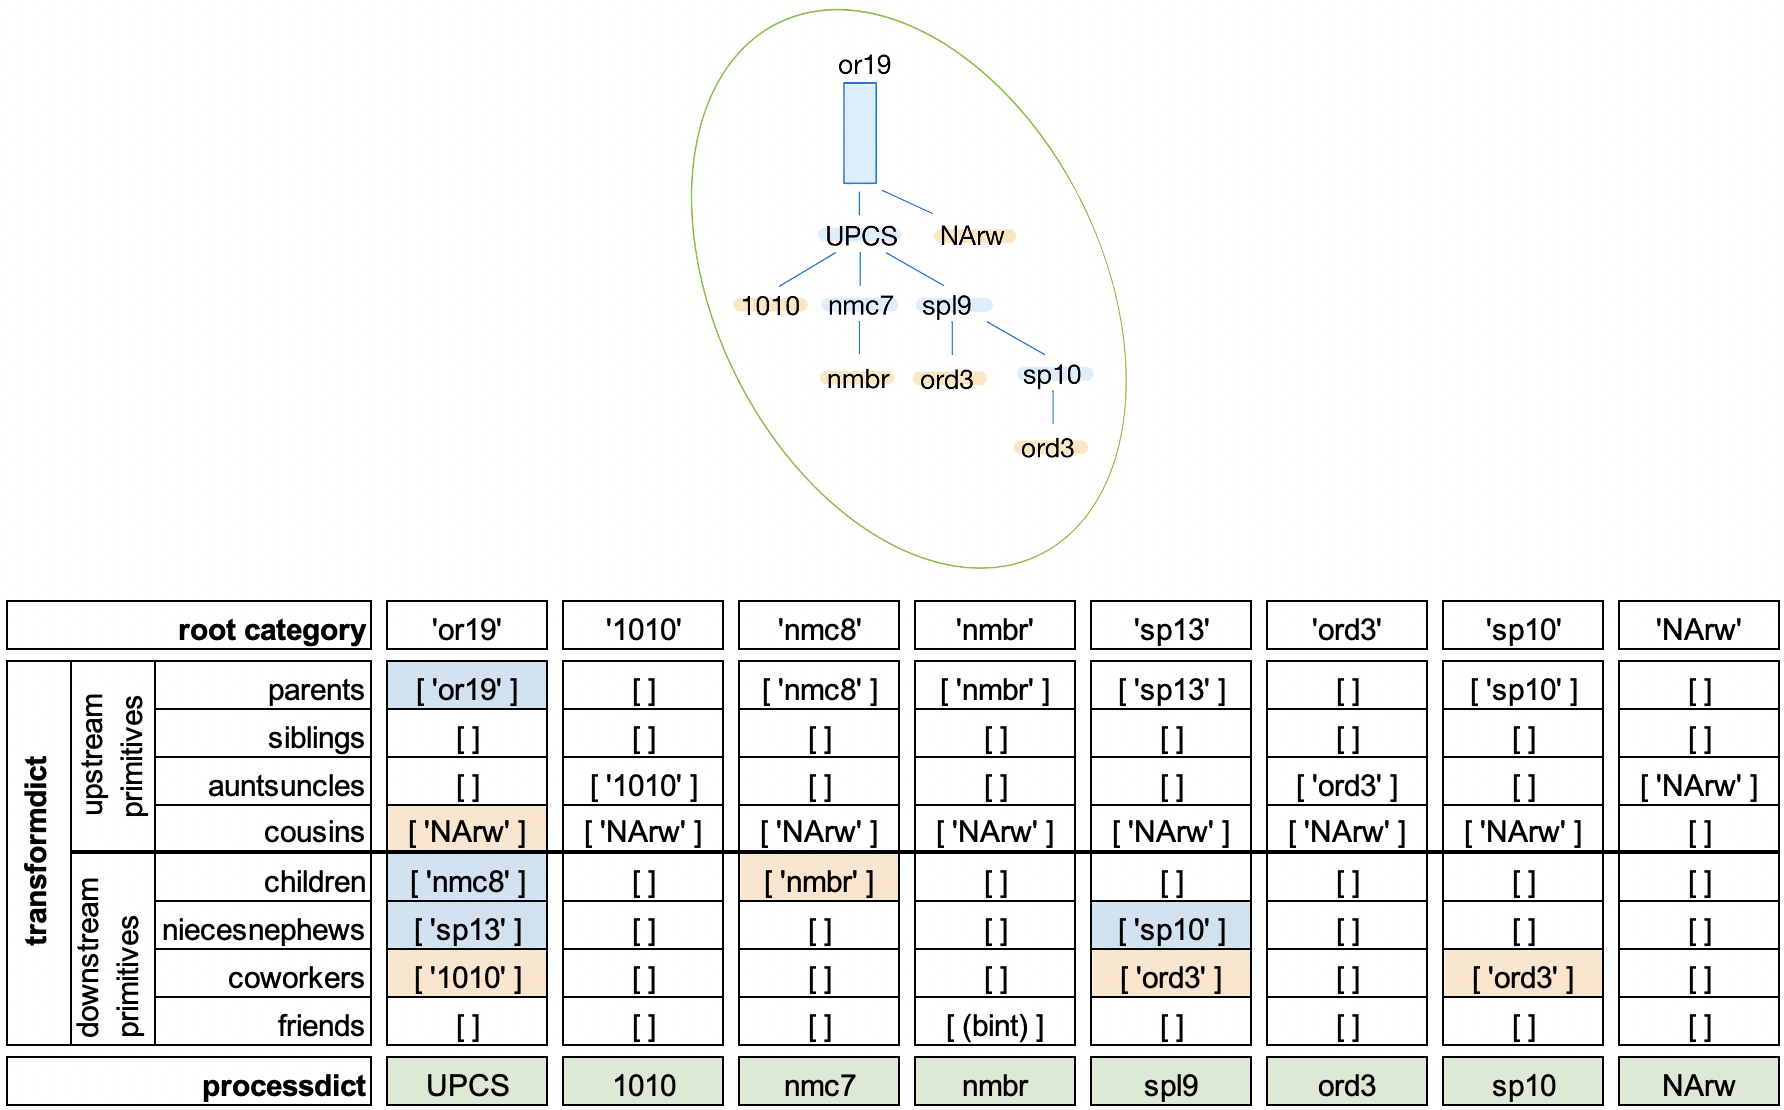

If we wanted to define the or19 root category from scratch, we could assemble a transformdict as follows. (Note that these are already defined internal to the library, this is just to illustrate.) Here we'll also demonstrate the supporting entries for completeness. Note that the only root category that will have its upstream primitives inspected is the root category assigned to the column (which for this demonstration is or19), the other upstream transformation category entries are not required, provided here to be consistent with their use in the library. 

In [4]:
transformdict = {}

transformdict.update({'or19' : {'parents'       : ['or19'], \
                                'siblings'      : [], \
                                'auntsuncles'   : [], \
                                'cousins'       : ['NArw'], \
                                'children'      : ['nmc8'], \
                                'niecesnephews' : ['sp13'], \
                                'coworkers'     : ['1010'], \
                                'friends'       : []}})

transformdict.update({'NArw' : {'parents'       : [], \
                                'siblings'      : [], \
                                'auntsuncles'   : ['NArw'], \
                                'cousins'       : [], \
                                'children'      : [], \
                                'niecesnephews' : [], \
                                'coworkers'     : [], \
                                'friends'       : []}})

transformdict.update({'nmc8' : {'parents'       : ['nmc8'], \
                                'siblings'      : [], \
                                'auntsuncles'   : [], \
                                'cousins'       : ['NArw'], \
                                'children'      : ['nmbr'], \
                                'niecesnephews' : [], \
                                'coworkers'     : [], \
                                'friends'       : []}})

#Note that the 'bint' entry in this tree internal to library is activated by binstransform parameter 
#(this is a relic from some early methods)
transformdict.update({'nmbr' : {'parents'       : ['nmbr'], \
                                'siblings'      : [], \
                                'auntsuncles'   : [], \
                                'cousins'       : ['NArw'], \
                                'children'      : [], \
                                'niecesnephews' : [], \
                                'coworkers'     : [], \
                                'friends'       : ['bint']}})

transformdict.update({'sp13' : {'parents'       : ['sp13'], \
                                'siblings'      : [], \
                                'auntsuncles'   : [], \
                                'cousins'       : ['NArw'], \
                                'children'      : [], \
                                'niecesnephews' : ['sp10'], \
                                'coworkers'     : ['ord3'], \
                                'friends'       : []}})

transformdict.update({'sp10' : {'parents'       : ['sp10'], \
                                'siblings'      : [], \
                                'auntsuncles'   : [], \
                                'cousins'       : ['NArw'], \
                                'children'      : [], \
                                'niecesnephews' : [], \
                                'coworkers'     : ['ord3'], \
                                'friends'       : []}})

transformdict.update({'ord3' : {'parents'       : [], \
                                'siblings'      : [], \
                                'auntsuncles'   : ['ord3'], \
                                'cousins'       : ['NArw'], \
                                'children'      : [], \
                                'niecesnephews' : [], \
                                'coworkers'     : [], \
                                'friends'       : []}})
                                
transformdict.update({'1010' : {'parents'       : [], \
                                'siblings'      : [], \
                                'auntsuncles'   : ['1010'], \
                                'cousins'       : ['NArw'], \
                                'children'      : [], \
                                'niecesnephews' : [], \
                                'coworkers'     : [], \
                                'friends'       : []}})

And here are the corresponding processdict entries. In addition to transformation functions we're also defining here a few properties associated with the transformation category.


In [5]:
from Automunge import Automunger
am = Automunger.AutoMunge()

processdict = {}

processdict.update({'or19' : {'dualprocess' : None, \
                              'singleprocess' : am.process_UPCS_class, \
                              'postprocess' : None, \
                              'inverseprocess' : am.inverseprocess_UPCS, \
                              'info_retention' : False, \
                              'inplace_option' : True, \
                              'NArowtype' : 'justNaN', \
                              'MLinfilltype' : 'exclude', \
                              'labelctgy' : 'ord3'}})

processdict.update({'NArw' : {'dualprocess' : None, \
                              'singleprocess' : am.process_NArw_class, \
                              'postprocess' : None, \
                              'NArowtype' : 'justNaN', \
                              'MLinfilltype' : 'boolexclude', \
                              'labelctgy' : 'NArw'}})

processdict.update({'nmc8' : {'dualprocess' : am.process_nmr4_class, \
                              'singleprocess' : None, \
                              'postprocess' : am.postprocess_nmr4_class, \
                              'inverseprocess' : am.inverseprocess_nmrc, \
                              'info_retention' : False, \
                              'defaultparams' : {'convention' : 'commas', \
                                                 'suffix' : '_nmc7', \
                                                 'test_same_as_train' : False}, \
                              'NArowtype' : 'parsenumeric_commas', \
                              'MLinfilltype' : 'numeric', \
                              'labelctgy' : 'nmbr'}})

processdict.update({'nmbr' : {'dualprocess' : am.process_numerical_class, \
                              'singleprocess' : None, \
                              'postprocess' : am.postprocess_numerical_class, \
                              'inverseprocess' : am.inverseprocess_nmbr, \
                              'info_retention' : True, \
                              'inplace_option' : True, \
                              'NArowtype' : 'numeric', \
                              'MLinfilltype' : 'numeric', \
                              'labelctgy' : 'nmbr'}})

processdict.update({'sp13' : {'dualprocess' : am.process_spl2_class, \
                              'singleprocess' : None, \
                              'postprocess' : am.postprocess_spl2_class, \
                              'inverseprocess' : am.inverseprocess_spl2, \
                              'info_retention' : False, \
                              'defaultparams' : {'suffix' : '_spl9', \
                                                 'test_same_as_train' : True, \
                                                 'consolidate_nonoverlaps' : False}, \
                              'NArowtype' : 'justNaN', \
                              'MLinfilltype' : 'exclude', \
                              'labelctgy' : 'ord3'}})

processdict.update({'sp10' : {'dualprocess' : am.process_spl2_class, \
                              'singleprocess' : None, \
                              'postprocess' : am.postprocess_spl2_class, \
                              'inverseprocess' : am.inverseprocess_spl2, \
                              'info_retention' : False, \
                              'defaultparams' : {'suffix' : '_sp10', \
                                                 'test_same_as_train' : True, \
                                                 'consolidate_nonoverlaps' : True}, \
                              'NArowtype' : 'justNaN', \
                              'MLinfilltype' : 'exclude', \
                              'labelctgy' : 'ord3'}})

processdict.update({'ord3' : {'dualprocess' : am.process_ord3_class, \
                              'singleprocess' : None, \
                              'postprocess' : am.postprocess_ord3_class, \
                              'inverseprocess' : am.inverseprocess_ord3, \
                              'info_retention' : True, \
                              'inplace_option' : True, \
                              'NArowtype' : 'justNaN', \
                              'MLinfilltype' : 'singlct', \
                              'labelctgy' : 'ord3'}})
                              
processdict.update({'1010' : {'dualprocess' : am.process_1010_class, \
                              'singleprocess' : None, \
                              'postprocess' : am.postprocess_1010_class, \
                              'inverseprocess' : am.inverseprocess_1010, \
                              'info_retention' : True, \
                              'NArowtype' : 'justNaN', \
                              'MLinfilltype' : '1010', \
                              'labelctgy' : '1010'}})

As an alternative example of processdict defined in it's simplest configuration, if we wanted to mirror the processdict of another entry we can just apply a functionpointer, such as shown here mirroring the 'retn' processdict entry to a newly defined 'newt' category:


In [6]:
processdict.update({'newt' : {'functionpointer' : 'retn'}})


And any of the other entries that we include will take precedense over the pointer,
such as shown here mirroring retn but with different default parameters passed to the function.

In [7]:
processdict.update({'newt2' : {'functionpointer' : 'retn',
                               'defaultparams' : {'cap' : True,
                                                  'floor' : True}
                              }
                   })       

Note that in cases like this where passing new defaultparams with a functionpointer, any other defaultparams in the pointer target will still be defined, just these new entries will take precendence in cases of redundancy.

When specified in full, here are what the different entries are for, further documented in read me.


- dualprocess is for transfomration functions that process a train and test feature set based on properties derived from the train set

- singleprocess is for transformation functions that can be applied to train or test sets independantly

- postprocess is for transfomratiuon functions that process a test set feature set based on properties derived in the corresponding dualprocess function

- NArowtype indicates the types of values that are targets for infill

- MLinfilltype indicates column data properties such as to inform ML infill methods

- labelctgy is for cases where a category is applied to a label column returned in multiple configurations indicating the target set such as for feature importance

- inverseprocess is for transfomration functions for inversion (to recover original form of data)

- info_retention supports inversion operations to designate if a transformation is fully invertible

- inplace_option supports inplace operations

- defaultparams designates any default parameters to pass to the tranfsormation functions

Once we have defined our transformation categories with entries in the transformdict and processdict, we can then assign those root categories to a column in assigncat.
```
assigncat = {'or19' : 'column1'}
```
We can then pass to an automunge(.) call. Note that all of these entries will be saved in the returned postprocess_dict, allowing for fully consistent processing in the postmunge(.) function on the train set basis. 
```
train, train_ID, labels, \
val, val_ID, val_labels, \
test, test_ID, test_labels, \
postprocess_dict \
= am.automunge(df_train,
               assigncat = assigncat,
               transformdict = transformdict,
               processdict = processdict)
```
(The only asterisk is that any externally defined transformation functions, such as any custom entries to dual/single/postprocess, would need to be reinitialized for postmunge.)

Of course bears repeating that these demonstrations were for illustrative purposes. All of these entries are already defined internal to the library, the full transformation set can be assigned to a feature column in assigncat just like any other root category.
```
assigncat = {'or19' : ['featurecolumn']}
```

** For further demonstrations of the or19 transformation set, including representative inputs and returned data outputs, please refer to the paper [String Theory
Parsed Categoric Encodings with Automunge](https://medium.com/automunge/string-theory-acbd208eb8ca), particularly Figures 4-7.

* patent pending, applications 16552857, 17021770